/tmp/ipykernel_301975/2061274326.py:108: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min * 0.7, x_max * 2.0) # Extra space on right for labels
/tmp/ipykernel_301975/2061274326.py:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


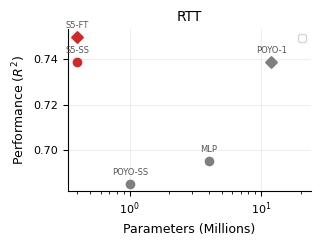

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set publication style settings
plt.rcParams.update({
    'font.size': 8,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 7,
    'figure.figsize': (3.25, 2.5), # Standard single-column width
    'font.family': 'sans-serif',
    'axes.spines.top': False,
    'axes.spines.right': False,
})

def parse_mean_std(val_str):
    """Parses strings like '0.739 +- 0.036' or '0.695'."""
    if not isinstance(val_str, str) or val_str.strip() == '-':
        return None, None
    
    if '+-' in val_str:
        mean, std = val_str.split('+-')
        return float(mean), float(std)
    else:
        return float(val_str), 0.0

def parse_params(param_str):
    """Parses strings like '0.4 M' into float 0.4."""
    if not isinstance(param_str, str) or param_str.strip() == '-':
        return None
    
    clean_str = param_str.replace(' M', '').strip()
    return float(clean_str)

def plot_scaling_law(csv_path, task_column, output_file=None):
    # 1. Load and Preprocess Data
    df = pd.read_csv(csv_path)
    
    # Extract data needed for plotting
    plot_data = []
    
    for _, row in df.iterrows():
        # Parse Parameters
        params = parse_params(row['parameters'])
        mean, std = parse_mean_std(row[task_column])
        
        if params is None or mean is None:
            continue
            
        model_name = row['model']
        is_ours = row['ours']
        is_finetuned = str(row['finetuned']).lower() == 'yes'
        
        # --- LOGIC CHANGE: Visual Semantics ---
        if "S5" in model_name:
            color = "#d62728" # Red for Ours (stands out)
        else:
            color = "#7f7f7f" # Grey for Baselines
            
        if is_finetuned:
            marker = 'D'
        else:
            marker = 'o'  
            
        plot_data.append({
            'model': model_name,
            'params': params,
            'mean': mean,
            'std': std,
            'color': color,
            'marker': marker,
            'is_ours': is_ours,
            'is_finetuned': is_finetuned
        })
    
    df_plot = pd.DataFrame(plot_data)

    # 2. Plotting
    fig, ax = plt.subplots()
    
    for _, row in df_plot.iterrows():
        # if row['std'] > 0:
        #     ax.errorbar(row['params'], row['mean'], yerr=row['std'], 
        #                 fmt='none', ecolor=row['color'], alpha=0.6, capsize=2)
        
        ax.scatter(row['params'], row['mean'], 
                   c=row['color'], marker=row['marker'], 
                   edgecolors=row['color'], 
                   s=30, zorder=10, linewidth=1.5)
        
        label_text = row['model'].split(' ')[0]

        ax.annotate(label_text, 
                    (row['params'], row['mean']),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom', fontsize=6, color='#555555')

    # 3. Formatting
    ax.set_xscale('log')
    ax.set_xlabel('Parameters (Millions)')
    ax.set_ylabel('Performance ($R^2$)')
    
    x_min, x_max = 0, df_plot['params'].max()
    ax.set_xlim(x_min * 0.7, x_max * 2.0) # Extra space on right for labels
    # ax.set_ylim(0, 1.0)
    
    ax.grid(True, which="major", ls="-", alpha=0.2)
    ax.legend()

    task_title = task_column.replace('nlb_', '').replace('_', ' ').upper()
    ax.set_title(task_title)

    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    
    plt.show()

# --- Usage ---
csv_path = '/cs/student/projects1/ml/2024/mlaimon/foundational_ssm/notebooks/results/table_1_results.csv'
plot_scaling_law(csv_path, task_column='nlb_rtt')

/tmp/ipykernel_301975/3304668524.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


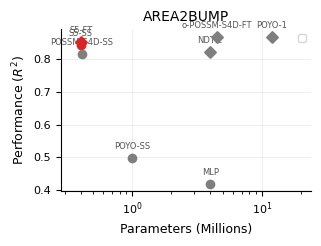

In [20]:
csv_path = '/cs/student/projects1/ml/2024/mlaimon/foundational_ssm/notebooks/results/table_1_results.csv'
plot_scaling_law(csv_path, task_column='nlb_area2bump')

/tmp/ipykernel_301975/2912412106.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


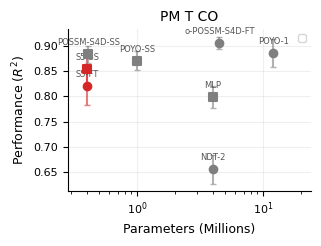

In [17]:
csv_path = '/cs/student/projects1/ml/2024/mlaimon/foundational_ssm/notebooks/results/table_1_results.csv'
plot_scaling_law(csv_path, task_column='pm_t_co')